In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/raneem/Downloads/supermarket_pred/sales.csv")

/var/folders/ts/c0z20d1s1rq1pd4h0py597pw0000gn/T/ipykernel_7200/2024007398.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/raneem/Downloads/supermarket_pred/sales.csv")


# Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,260670,166,2,2013-01-01,0,0,0,a,1,0
1,366950,278,2,2013-01-01,0,0,0,a,1,0
2,179596,519,2,2013-01-01,0,0,0,a,1,0
3,216955,234,2,2013-01-01,0,0,0,a,1,0
4,201196,270,2,2013-01-01,0,0,0,a,1,0


In [4]:
df.info() 
# There is no Null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592561 entries, 0 to 592560
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           592561 non-null  int64 
 1   store_ID             592561 non-null  int64 
 2   day_of_week          592561 non-null  int64 
 3   date                 592561 non-null  object
 4   nb_customers_on_day  592561 non-null  int64 
 5   open                 592561 non-null  int64 
 6   promotion            592561 non-null  int64 
 7   state_holiday        592561 non-null  object
 8   school_holiday       592561 non-null  int64 
 9   sales                592561 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 45.2+ MB


In [5]:
df.drop(['Unnamed: 0', 'store_ID'], inplace=True, axis=1)
df.head()

,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,2,2013-01-01,0,0,0,a,1,0
1,2,2013-01-01,0,0,0,a,1,0
2,2,2013-01-01,0,0,0,a,1,0
3,2,2013-01-01,0,0,0,a,1,0
4,2,2013-01-01,0,0,0,a,1,0


In [6]:
df.describe()

,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000
mean,4.002315,634.848002,0.831509,0.379419,0.181418,5744.577431
std,1.995855,465.330476,0.374302,0.485243,0.385364,3832.896126
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,404.000000,1.000000,0.000000,0.000000,3703.000000
50%,4.000000,609.000000,1.000000,0.000000,0.000000,5702.000000
75%,6.000000,839.000000,1.000000,1.000000,0.000000,7808.000000
max,7.000000,5494.000000,1.000000,1.000000,1.000000,38037.000000


In [7]:
duplicates = df[df.duplicated()]

print(duplicates)

        day_of_week        date  nb_customers_on_day  open  promotion  \
1                 2  2013-01-01                    0     0          0   
2                 2  2013-01-01                    0     0          0   
3                 2  2013-01-01                    0     0          0   
4                 2  2013-01-01                    0     0          0   
5                 2  2013-01-01                    0     0          0   
...             ...         ...                  ...   ...        ...   
587895            7  2015-02-22                    0     0          0   
587896            7  2015-02-22                    0     0          0   
587897            7  2015-02-22                    0     0          0   
588650            1  2015-02-23                    0     0          0   
592265            6  2015-02-28                    0     0          0   

       state_holiday  school_holiday  sales  
1                  a               1      0  
2                  a           

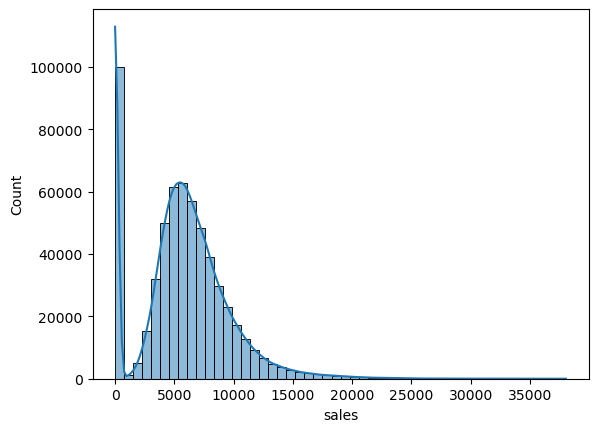

In [8]:
sns.histplot(df['sales'], bins=50, kde=True)
plt.show()

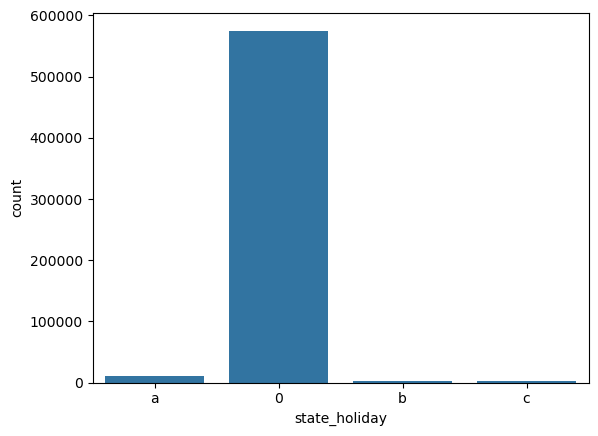

In [9]:
sns.countplot(x=df['state_holiday'])
plt.show()

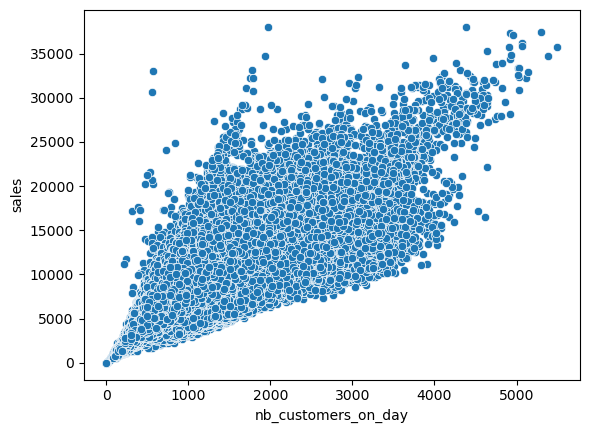

In [10]:
sns.scatterplot(x='nb_customers_on_day', y='sales', data=df)
plt.show()

In [11]:
df['state_holiday'].value_counts()

state_holiday
0    572395
a     11363
b      3167
c      2899
0      2737
Name: count, dtype: int64

# Data Preprocessing

In [12]:
for val in df['state_holiday'].unique():
    print(f"Value: {val}, Type: {type(val)}") 
# The 0 is counted as two types : str and int, so we will convert all to strings then encoding them.

Value: a, Type: <class 'str'>
Value: 0, Type: <class 'str'>
Value: b, Type: <class 'str'>
Value: c, Type: <class 'str'>
Value: 0, Type: <class 'int'>


In [13]:
df['state_holiday'] = df['state_holiday'].astype(str)
df['state_holiday'].value_counts()

state_holiday
0    575132
a     11363
b      3167
c      2899
Name: count, dtype: int64

In [14]:
# Now we will encode with LabelEncoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['state_holiday'] = encoder.fit_transform(df['state_holiday'])
df['state_holiday'].value_counts()

state_holiday
0    575132
1     11363
2      3167
3      2899
Name: count, dtype: int64

In [15]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0        2013-01-01
1        2013-01-01
2        2013-01-01
3        2013-01-01
4        2013-01-01
            ...    
592556   2015-02-28
592557   2015-02-28
592558   2015-02-28
592559   2015-02-28
592560   2015-02-28
Name: date, Length: 592561, dtype: datetime64[ns]

In [16]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop('date', inplace=True, axis=1)

In [17]:
df.head()

,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day
0,2,0,0,0,1,1,0,2013,1,1
1,2,0,0,0,1,1,0,2013,1,1
2,2,0,0,0,1,1,0,2013,1,1
3,2,0,0,0,1,1,0,2013,1,1
4,2,0,0,0,1,1,0,2013,1,1


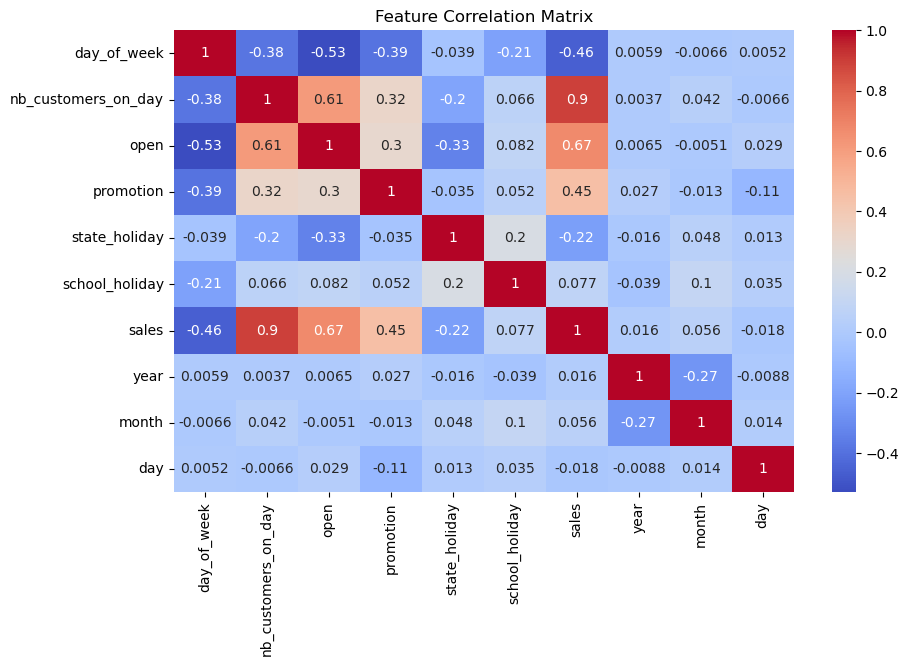

In [18]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()
# strong correlation between sales and numper of customers per day, and with open feature

In [19]:
# The most important variable to determine sales is :
# nb_customers_on_day    0.897044
# open                   0.674661
# promotion              0.451301

# Model Implementation :

# Test 1

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [21]:
model = LinearRegression()
X = df.drop('sales', axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [22]:
r2_score(y_train, y_pred)

0.8554214062402736

In [23]:
r2_score(y_test, y_test_pred)

0.8562384581083493

In [24]:
print(mean_absolute_error(y_test, y_test_pred))

975.6618934635414


# Test 2

In [25]:
# test with most importatnt features :
df2 = df[['promotion', 'nb_customers_on_day', 'open', 'year', 'month', 'sales']]
df2.head()

,promotion,nb_customers_on_day,open,year,month,sales
0,0,0,0,2013,1,0
1,0,0,0,2013,1,0
2,0,0,0,2013,1,0
3,0,0,0,2013,1,0
4,0,0,0,2013,1,0


In [26]:
model = LinearRegression()
X2 = df2.drop('sales', axis=1)
y2 = df2['sales']

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [27]:
r2_score(y_train, y_pred)

0.8544064189624612

In [28]:
y_test_pred = model.predict(X_test)

In [29]:
r2_score(y_test, y_test_pred)

0.8553630015783648

In [30]:
print(mean_absolute_error(y_test, y_test_pred))

976.0880785397165


# Test 3

In [31]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 899.4299570460606
Mean Squared Error: 1866276.1144466258
R² Score: 0.873117064775399


# Real Data

In [33]:
real_df = pd.read_csv("/Users/raneem/Downloads/supermarket_pred/real_data.csv")
real_df.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,419571,637,7,2015-03-01,0,0,0,0,0
1,378043,801,7,2015-03-01,0,0,0,0,0
2,282522,354,7,2015-03-01,0,0,0,0,0
3,77715,371,7,2015-03-01,0,0,0,0,0
4,205875,515,7,2015-03-01,0,0,0,0,0


In [34]:
real_df.drop(['Unnamed: 0', 'store_ID'], inplace=True, axis=1)
real_df.head()

,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,7,2015-03-01,0,0,0,0,0
1,7,2015-03-01,0,0,0,0,0
2,7,2015-03-01,0,0,0,0,0
3,7,2015-03-01,0,0,0,0,0
4,7,2015-03-01,0,0,0,0,0


In [35]:
real_df['state_holiday'].value_counts()

state_holiday
0    115078
a      2884
b      1522
Name: count, dtype: int64

In [36]:
encoder = LabelEncoder()

real_df['state_holiday'] = encoder.fit_transform(real_df['state_holiday'])
real_df['state_holiday'].value_counts()

state_holiday
0    115078
1      2884
2      1522
Name: count, dtype: int64

In [37]:
real_df['date'] = pd.to_datetime(real_df['date'])
real_df['year'] = real_df['date'].dt.year
real_df['month'] = real_df['date'].dt.month
real_df['day'] = real_df['date'].dt.day
real_df.drop('date', inplace=True, axis=1)

In [38]:
real_df.shape

(119484, 9)

In [39]:
model = LinearRegression()
X = df.drop('sales', axis=1)
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_test_real = model.predict(real_df)

In [40]:
y_test_real

array([-4.07431013e+00, -4.07431013e+00, -4.07431013e+00, ...,
        7.25042058e+03,  7.71544544e+03,  6.68272789e+03])

In [41]:
predictions = pd.Series(y_test_real, name='Predictions')
predictions.to_csv('Results.csv', index=False)